In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model 

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.drop(columns="id", inplace=True)

In [4]:
X=df.drop(columns="smoking")
Y=df.smoking

## Exploración de datos 

In [5]:
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,...,55,80,14.4,1,1.1,22,17,37,0,1


In [6]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

## Visualización de datos

Examino la distribución de las variable categórica objetivo (Y) utilizando gráficos de barras.

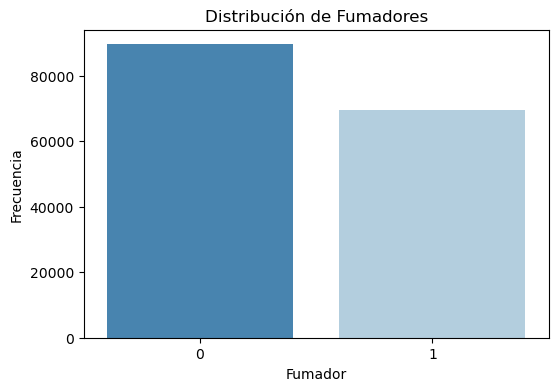

In [8]:
fig, ax = plt.subplots(figsize=(6,4)) 
sns.countplot(x='smoking', data=df, palette="Blues_r")
plt.xlabel('Fumador')
plt.ylabel('Frecuencia')
plt.title('Distribución de Fumadores')
plt.show()

Realizo un análisis de datos exploratorios para entender la distribución de las variables usando gráficos como histogramas

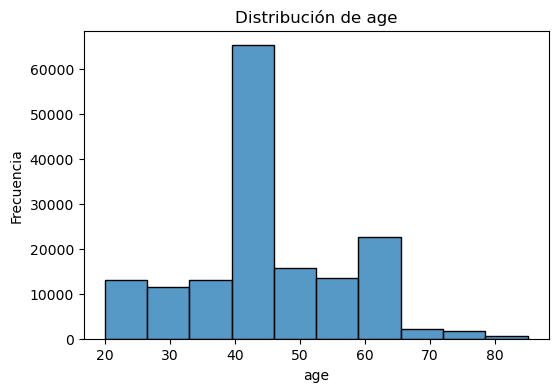

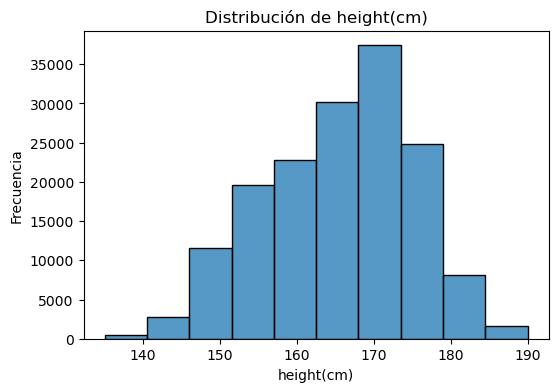

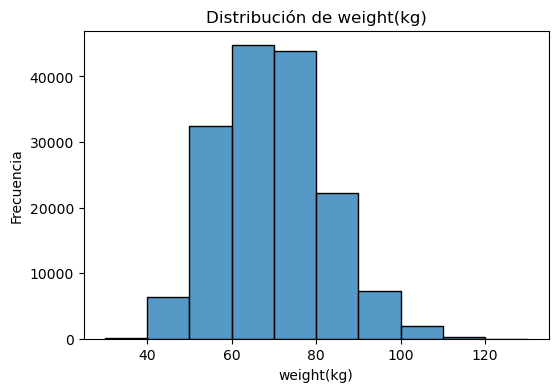

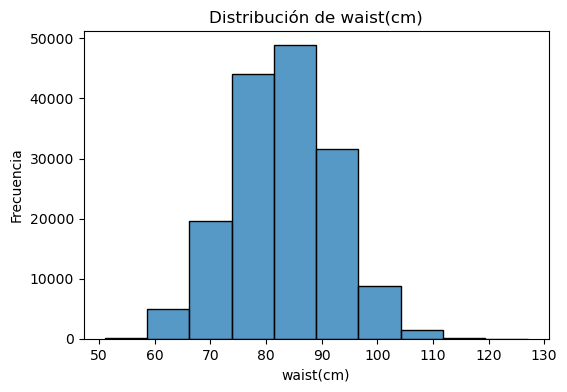

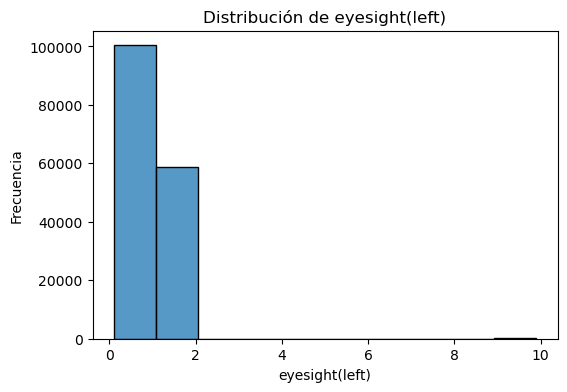

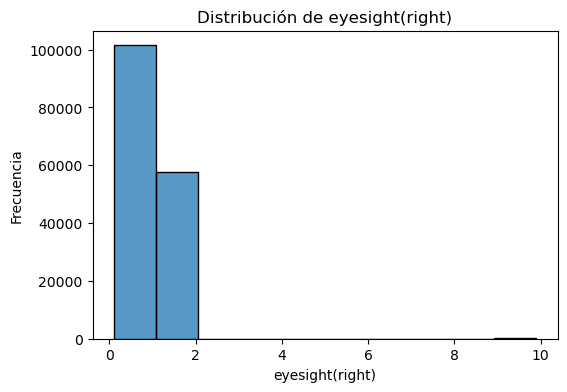

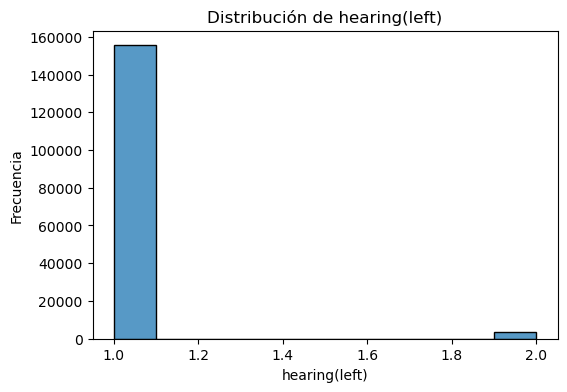

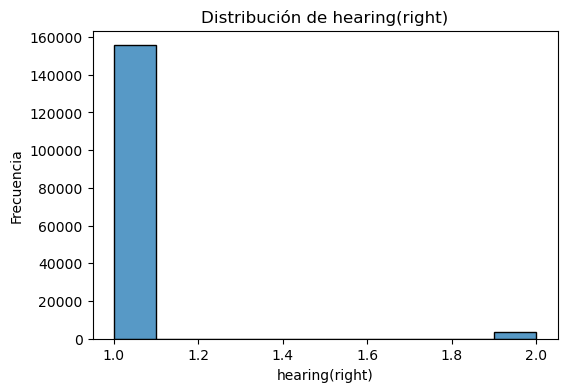

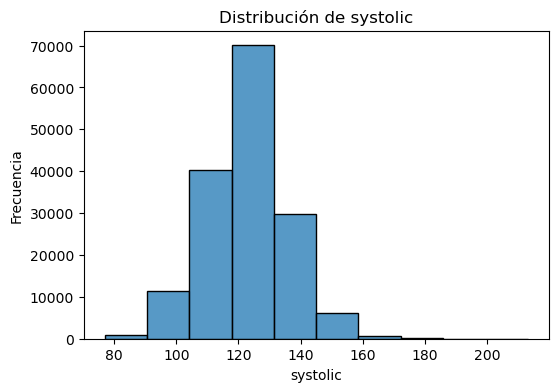

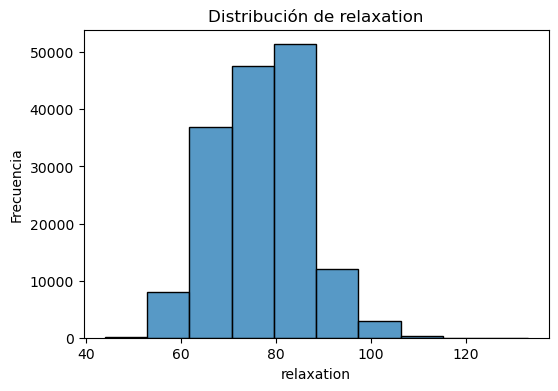

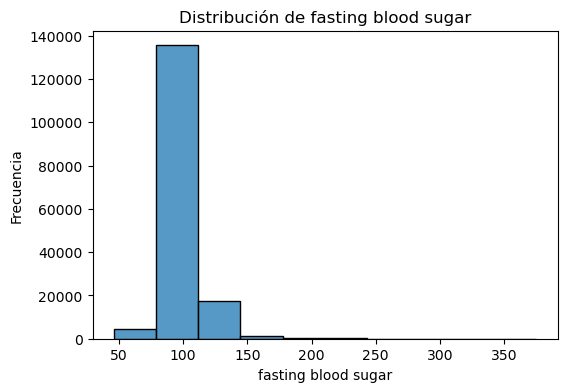

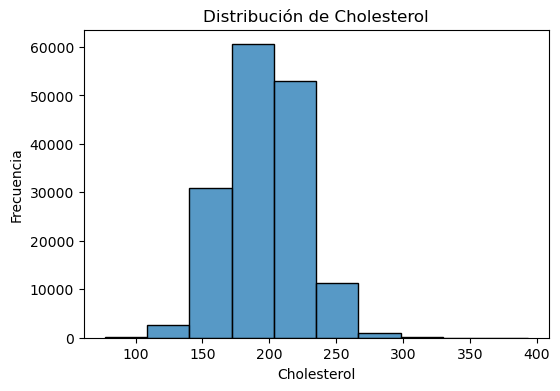

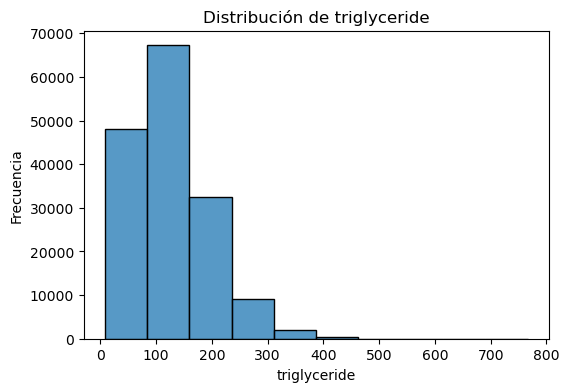

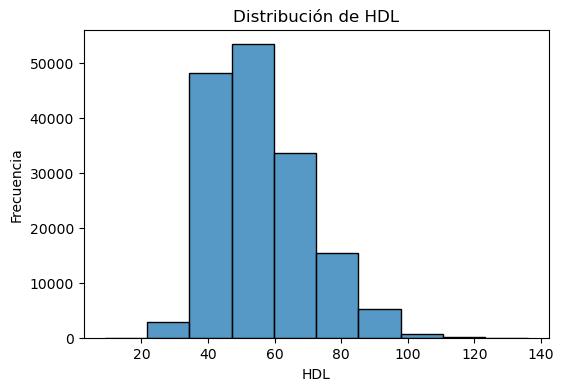

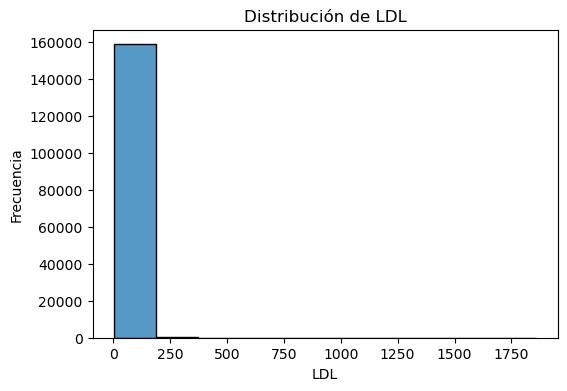

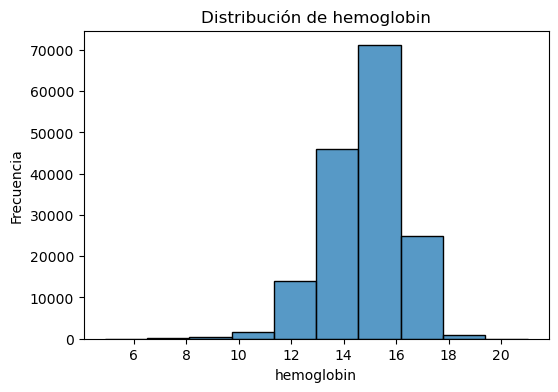

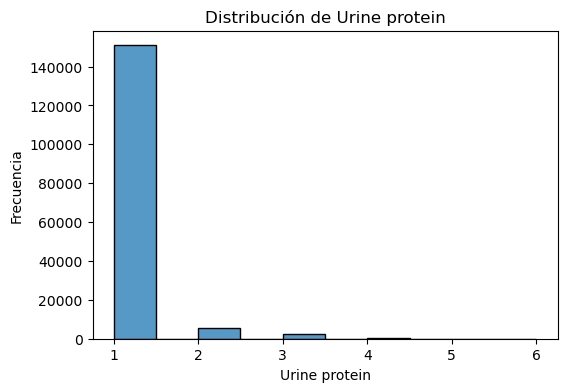

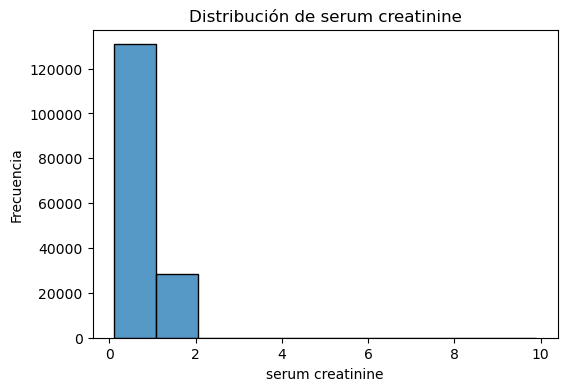

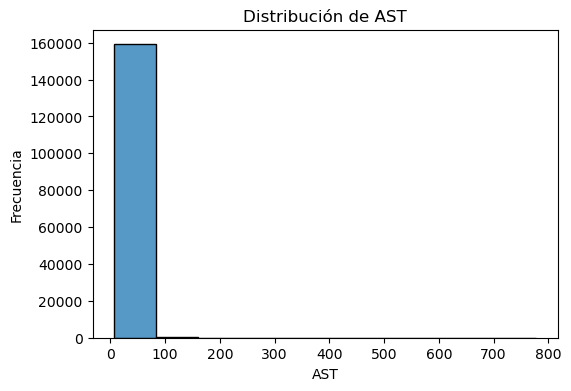

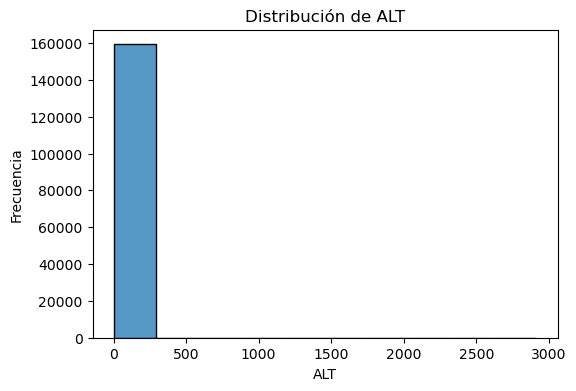

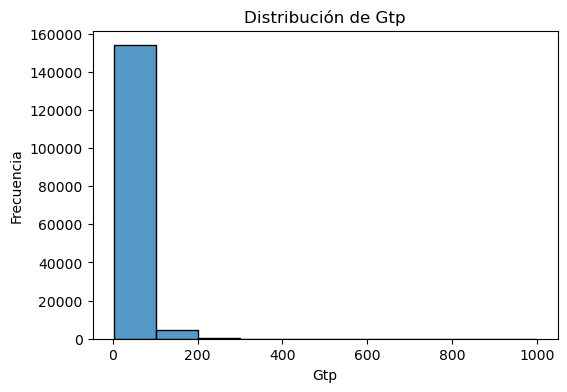

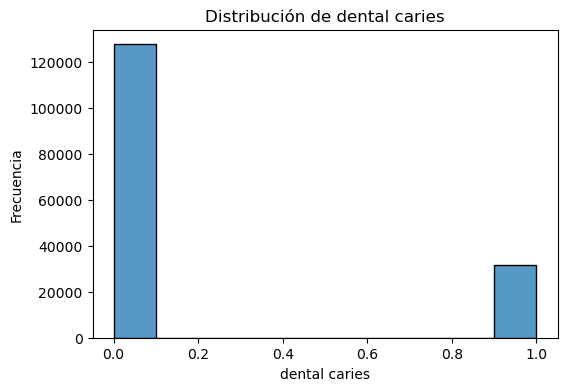

In [9]:
columnas = df.iloc[:,0:22]
for i in columnas:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=i, bins=10)
    plt.xlabel(i)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {i}')
    plt.show()

### Análisis de las variables en relación a la Y

#### Height(CM) and Smoking = Media de altura en fumadores es mayor que para no fumadores

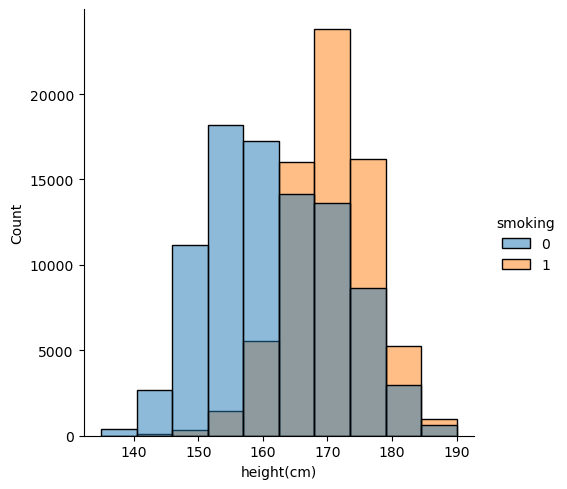

In [10]:
sns.displot(
    data = df, 
    x="height(cm)", 
    hue="smoking",
    bins= 10
)

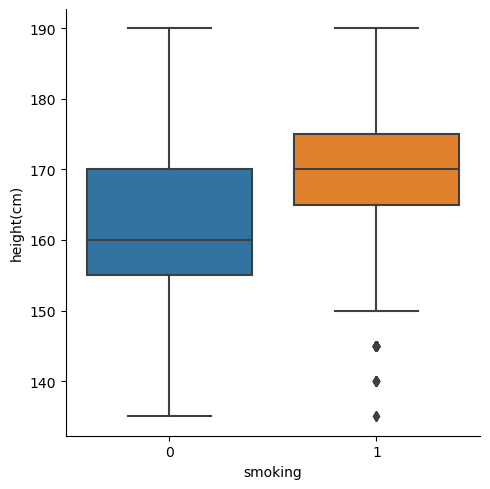

In [11]:
sns.catplot(x="smoking",  #la media de altura para fumadores es más alta que para no fumadores
            y= "height(cm)",
            kind="box",
            data= df)

#### Age and Smoking = Media de edad en fumadores es menor que para no fumadores

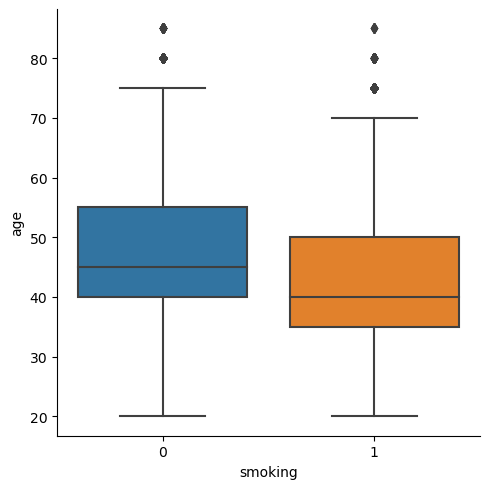

In [12]:
sns.catplot(x="smoking",  #la media de edad para fumadores es más baja que para no fumadores
            y= "age",
            kind="box",
            data= df)

#### Weight(Kg) and Smoking = En general, los fumadores tienen más peso que los no fumadores

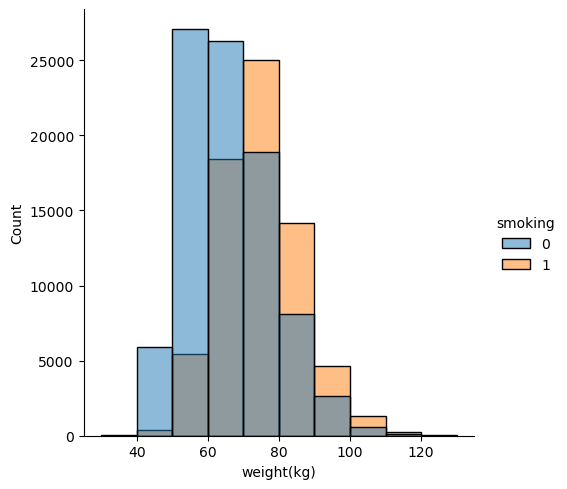

In [13]:
sns.displot(
    data = df, 
    x="weight(kg)", 
    hue="smoking",
    bins= 10
)

#### Cholesterol and Smoking = En general, la media es similar para ambos grupos

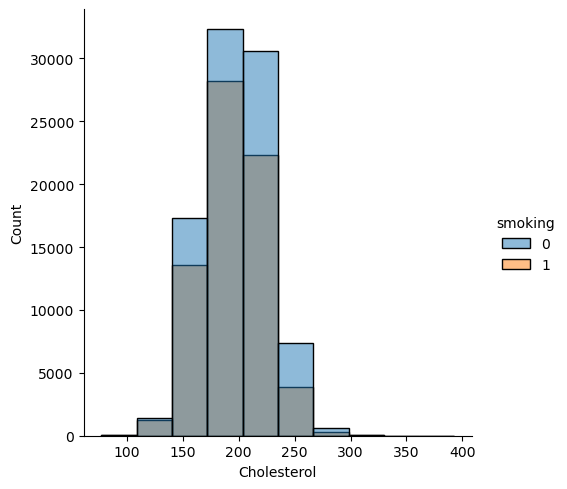

In [14]:
sns.displot(
    data = df, 
    x="Cholesterol", 
    hue="smoking",
    bins= 10
)


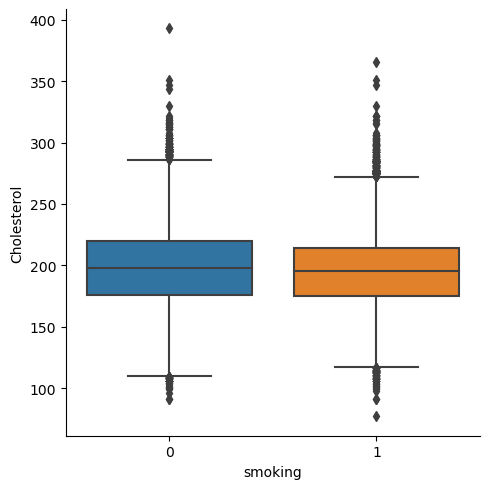

In [15]:
sns.catplot(x="smoking",  
            y= "Cholesterol",
            kind="box",
            data= df)

#### Systolic/relaxation and Smoking = Similar entre fumador y no fumador. Solo "relaxation" es mayor para los fumadores

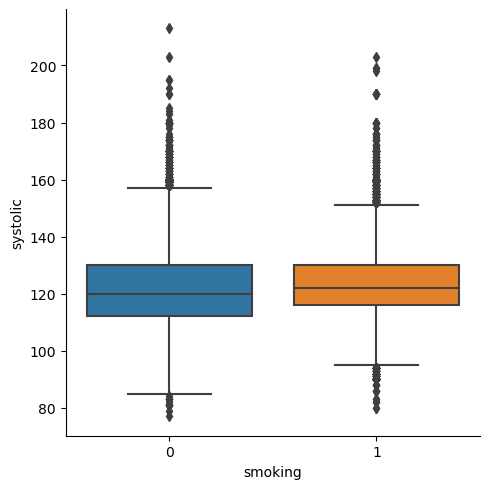

In [16]:
sns.catplot(x="smoking",  #niveles similares de presión arterial para fumadores y no fumadores
            y= "systolic",
            kind="box",
            data= df)

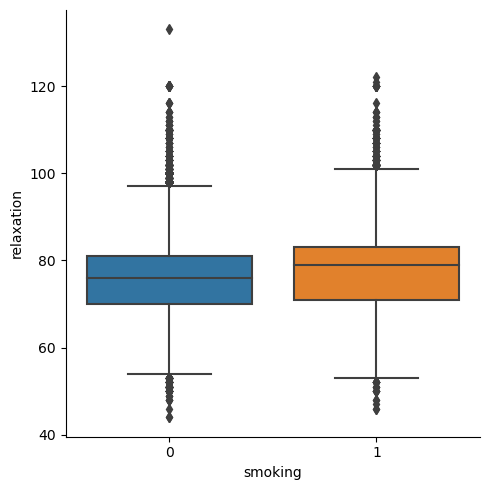

In [17]:
sns.catplot(x="smoking",  #la media de edad para fumadores es más baja que para no fumadores
            y= "relaxation",
            kind="box",
            data= df)

### Gráficos de barras para variables categóricas

En vista, podemos observar en ambos ojos que los fumadores tienen un mayor cantidad (de dioptrías) a partir del 1.5

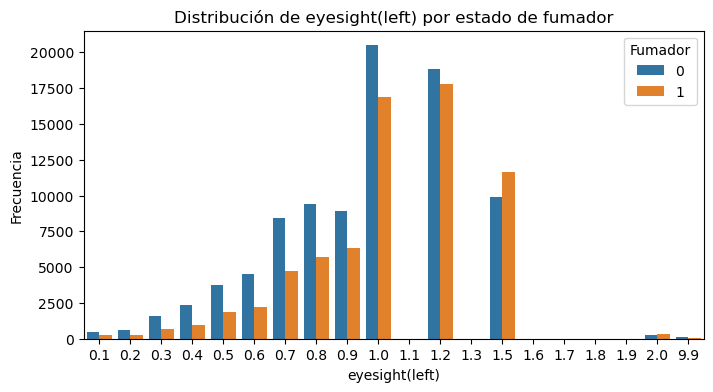

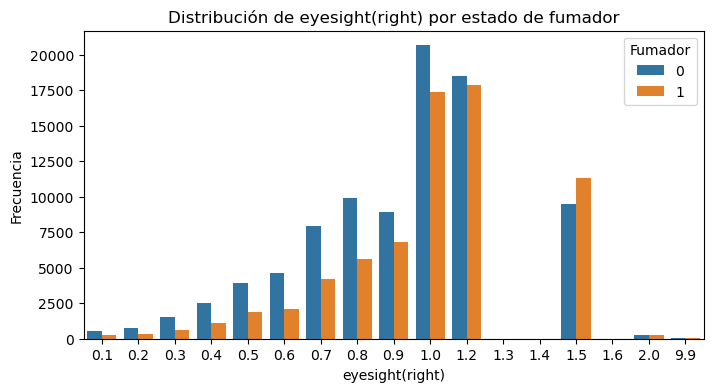

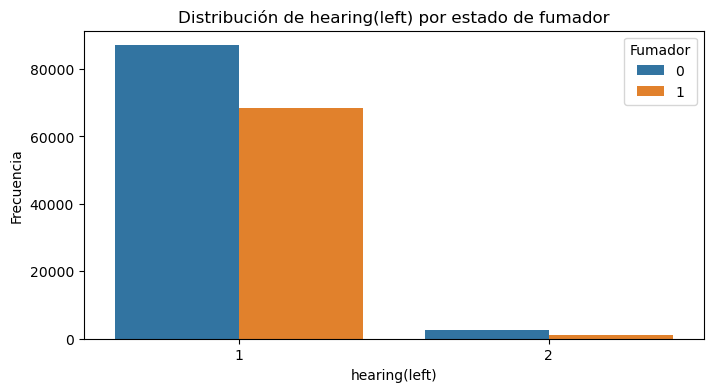

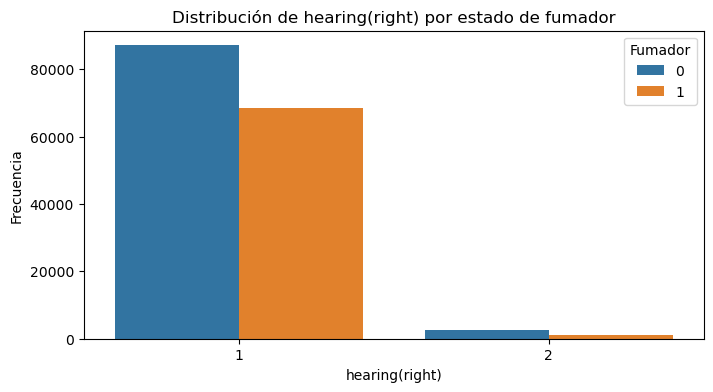

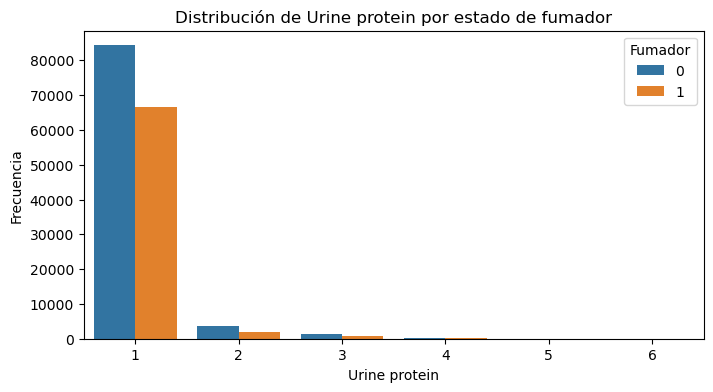

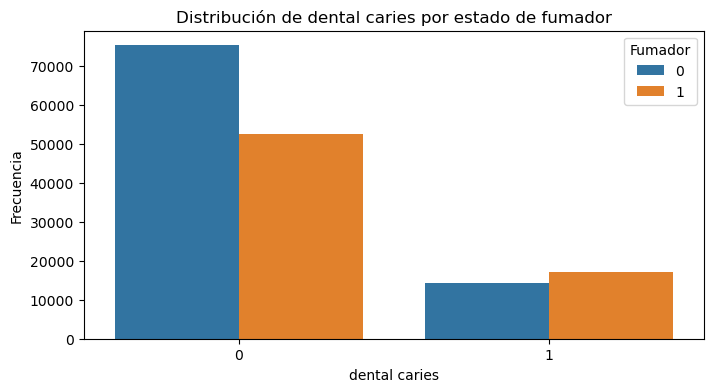

In [18]:
categorical_vars = ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', "Urine protein", "dental caries"]

for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, hue='smoking', data=df)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {var} por estado de fumador')
    plt.legend(title='Fumador')
    plt.show()

## Correlación de variables

Realizo correlaciones entre variables para entender las relaciones entre las variables y cómo están relacionadas con la variable objetivo 'smoking'.

array(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine',
       'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'], dtype=object)

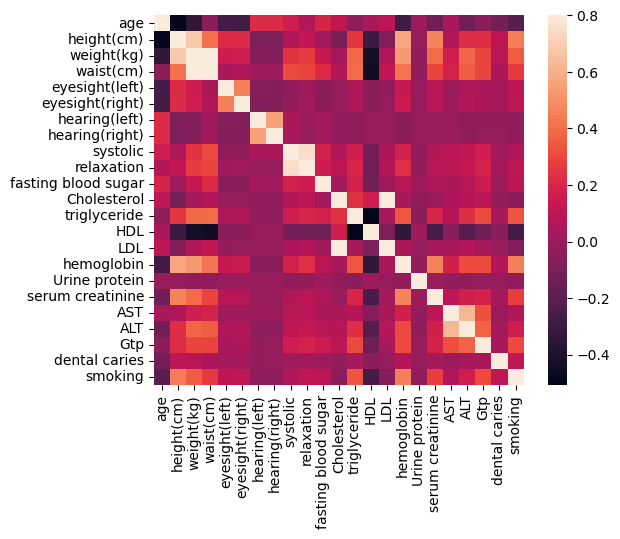

In [19]:
corrmat = df.corr()   #aquí puedo ver que el peso y los cm de cadera están correlacionados, también "systolic" y "relaxation"
sns.heatmap(corrmat, vmax=.8, square=True)
df.columns.values

"Systolic" y "relaxation" generalmente se refieren a la presión arterial sistólica y diastólica.  Estas dos medidas están estrechamente relacionadas, ya que ambas son componentes clave de la presión arterial total.

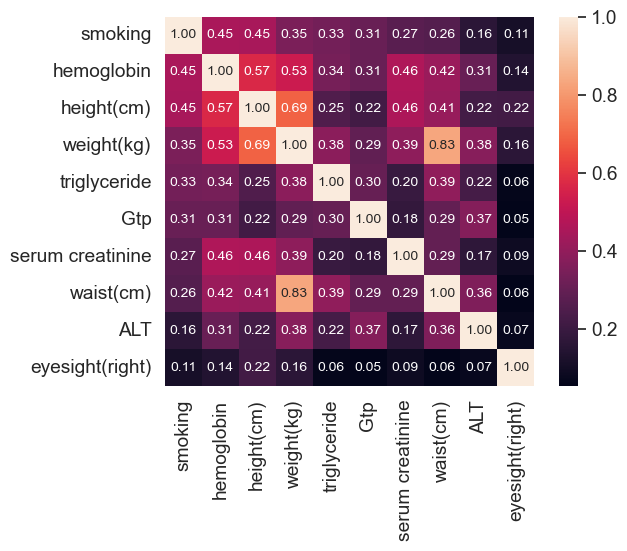

In [53]:
#Ampliación matriz, para variable que se selecciona muestra las 10 más correlacioandas con nuestra Y
k = 10 #numero de variables
cols = corrmat.nlargest(k, 'smoking')['smoking'].index  #esto escoge las 10 variables con correlaciones más altas 
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Creación de variables nuevas

A partir del anális de datos anterior voy a crear nuevas columnas que mejoren el rendimiento de mi modelo posterior

### - Índice de Masa Corporal (IMC): Calculo el IMC a partir de la altura y el peso de los pacientes

La altura y el peso están correlacionadas, así que las uno con el IMC en una columna

In [20]:
IMC = df["weight(kg)"] / ((df['height(cm)'] / 100) ** 2)
df["IMC"] = IMC

El IMC en personas fumadoras es ligeramente mayor que en no fumadoras 

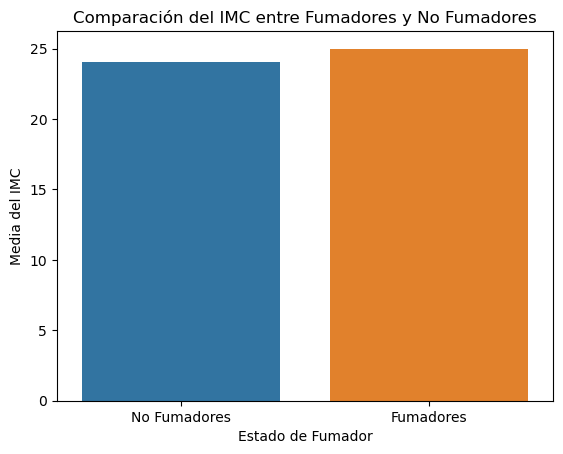

In [21]:

# Calcula la media del IMC para fumadores y no fumadores
imc_mean = df.groupby('smoking')['IMC'].mean().reset_index()

# Crea el gráfico de barras
sns.barplot(x='smoking', y='IMC', data=imc_mean)
plt.xlabel('Estado de Fumador')
plt.ylabel('Media del IMC')
plt.title('Comparación del IMC entre Fumadores y No Fumadores')
plt.xticks([0, 1], ['No Fumadores', 'Fumadores'])
plt.show()


### -Relación peso-cadera

El peso y los cm por cadera hemos visto que están correlacionados en los análisis anteriores. Esta nueva variable puede ser una característica útil, ya que refleja la proporción entre el peso y la medida de la cadera de los pacientes.

In [22]:
df['weight_to_hip_ratio'] = df['weight(kg)'] / df['waist(cm)']

Los fumadores tienen un mayor índice en la relación entre peso y cadera

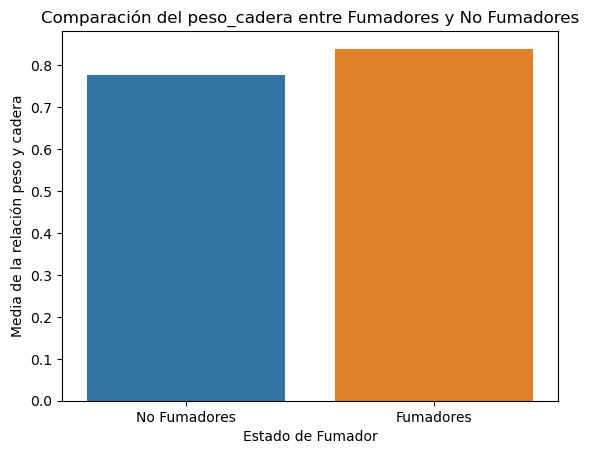

In [23]:

# Calcula la media del IMC para fumadores y no fumadores
Peso_cadera = df.groupby('smoking')['weight_to_hip_ratio'].mean().reset_index()

# Crea el gráfico de barras
sns.barplot(x='smoking', y='weight_to_hip_ratio', data=Peso_cadera)
plt.xlabel('Estado de Fumador')
plt.ylabel('Media de la relación peso y cadera')
plt.title('Comparación del peso_cadera entre Fumadores y No Fumadores')
plt.xticks([0, 1], ['No Fumadores', 'Fumadores'])
plt.show()

### Presión arterial: "Systolic" y "relaxation"-Cálculo de una presión arterial alta

La presión arterial alta se define como una presión sistólica de 130 o más, o una presión diastólica(relaxation) de 80 o más.

In [24]:
def presión_arterial_alta(systolic, relaxation):
    if systolic >= 130 and relaxation > 80:
        return 1
    else:
        return 0

In [25]:
df['Presión arterial'] = df.apply(lambda row: presión_arterial_alta(row['systolic'], row['relaxation']), axis=1)

En el gráfico no podemos observar una relación clara entre fumadores y una presión arterial alta

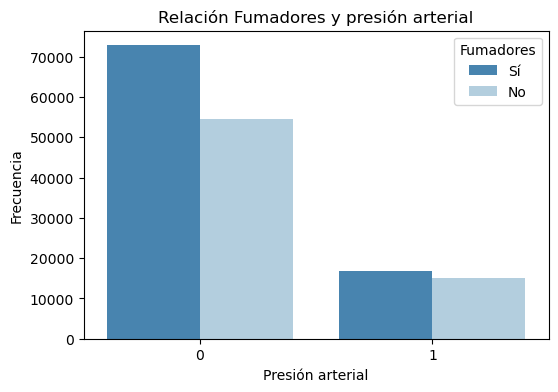

In [26]:
fig, ax = plt.subplots(figsize=(6,4)) 
sns.countplot(x='Presión arterial', hue= "smoking", data=df, palette="Blues_r")
plt.xlabel('Presión arterial')
plt.ylabel('Frecuencia')
plt.title('Relación Fumadores y presión arterial')
plt.legend(title='Fumadores',labels=['Sí', 'No'])
plt.show()

### Vista en los dos ojos

In [27]:
df['Media_vista'] = (df['eyesight(left)'] + df['eyesight(right)']) 

Los fumadores tiene peor vista que los no fumadores

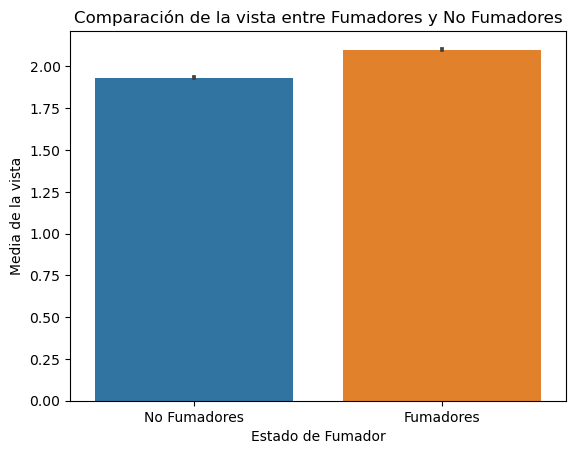

In [28]:
sns.barplot(x='smoking', y='Media_vista', data=df)
plt.xlabel('Estado de Fumador')
plt.ylabel('Media de la vista')
plt.title('Comparación de la vista entre Fumadores y No Fumadores')
plt.xticks([0, 1], ['No Fumadores', 'Fumadores'])
plt.show()

Queremos observar a partir de que tramo los Fumadores tienen peor vista, para después hacer una clasificación por tramo

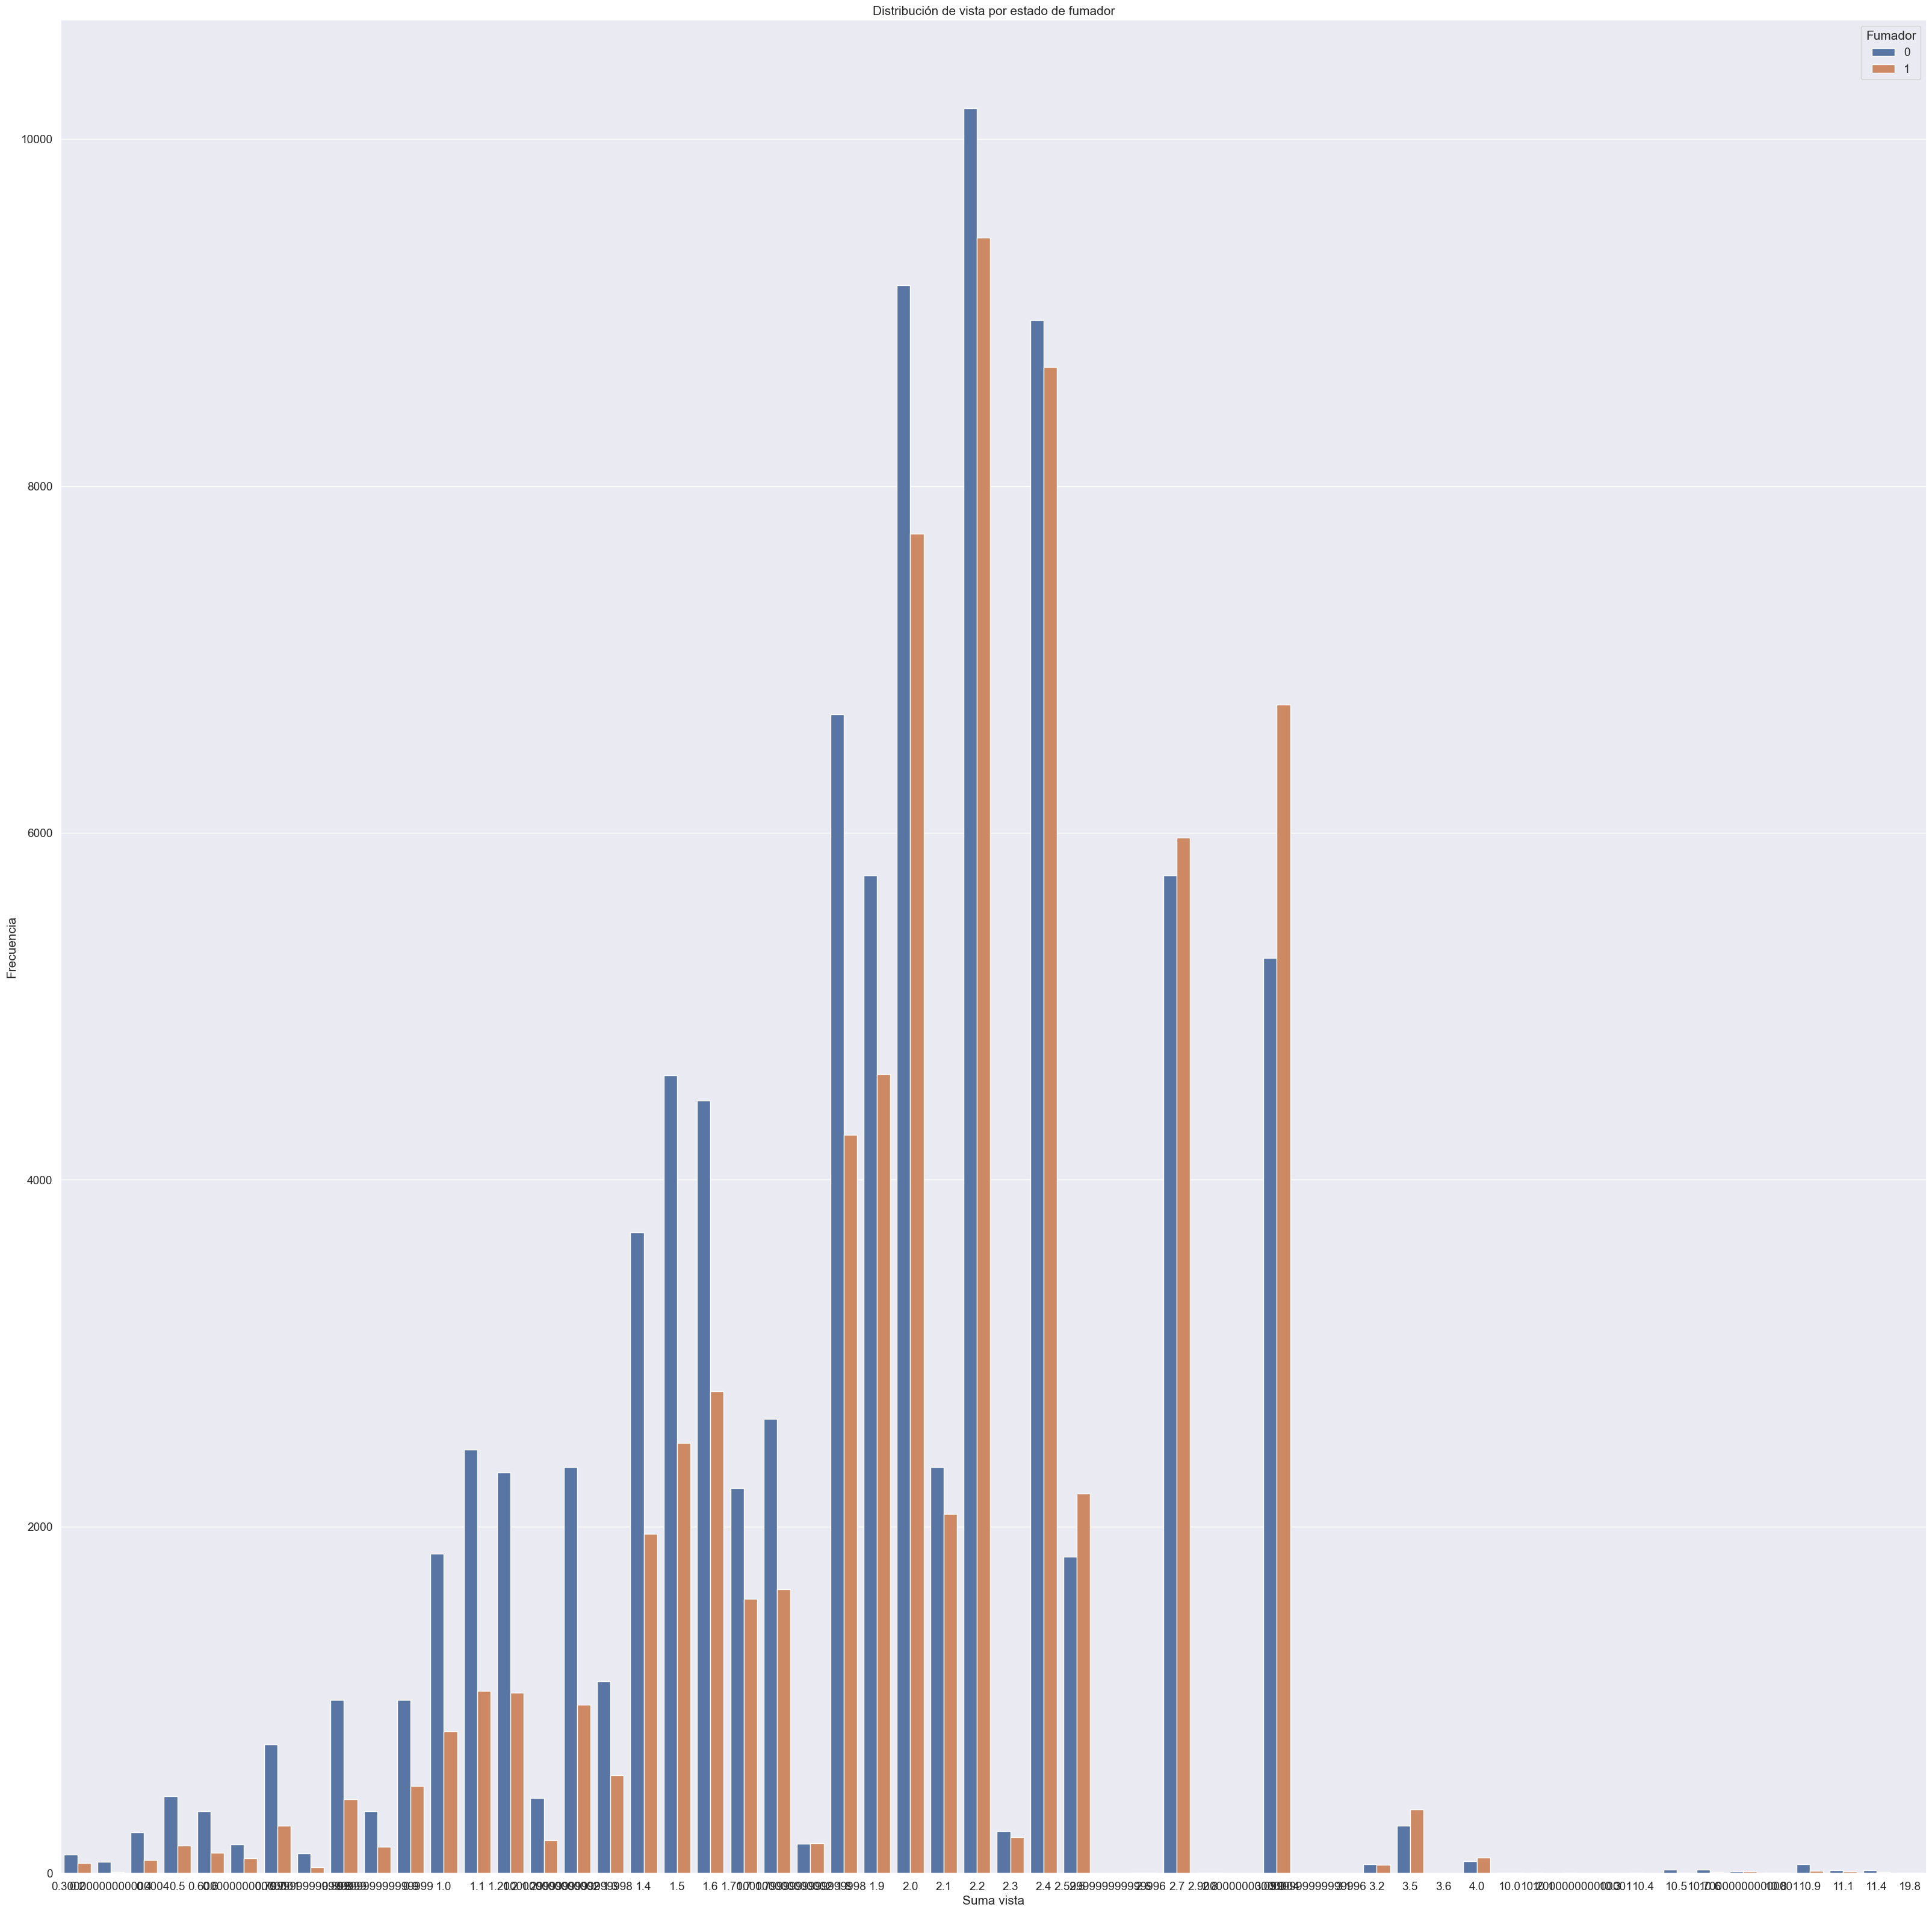

In [108]:
plt.figure(figsize=(40, 40))
sns.countplot(x="Media_vista", hue='smoking', data=df)
plt.xlabel("Suma vista")
plt.ylabel('Frecuencia')
plt.title(f'Distribución de vista por estado de fumador')
plt.legend(title='Fumador')
plt.show()

A partir del 2.7 los fumadores tienen peor vista. Por ello, clasificamos por tramos:

In [51]:
df['Vista_tramos'] = pd.cut(df['Media_vista'], bins=[0, 2.7, 4, 20], labels=[ 'Baja', 'Media', 'Alta'])

En el tramo "Vista media" los fumadores tienen ligeramente peor vista que los no fumadores

<Axes: xlabel='Vista_tramos', ylabel='count'>

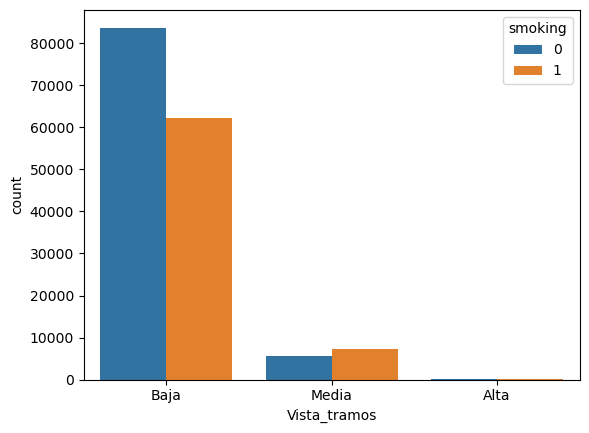

In [52]:
sns.countplot(
    data = df, 
    x="Vista_tramos", 
    hue="smoking",
)

In [54]:
df =pd.get_dummies(df, columns=['Vista_tramos'], drop_first=True)

### Relación entre el colesterol y LDL

Calculo el cociente entre LDL(colesterol malo) y el colesterol total, ya que esto puede proporcionar una medida de la proporción de LDL en el colesterol total.

In [56]:
df['Colesterol_LDL'] = df['LDL'] / df['Cholesterol']


No hay una diferencia clara para esta variable entre fumadores y no fumadores

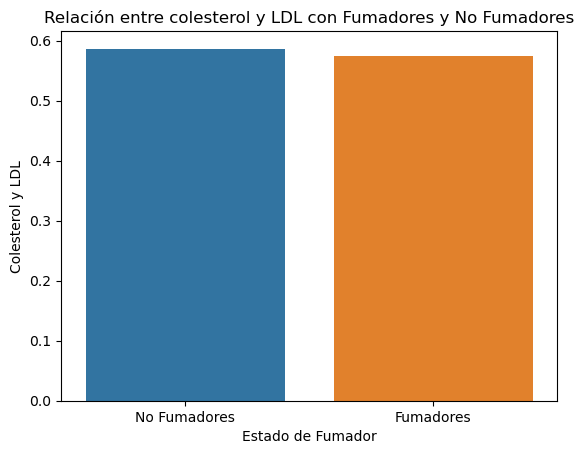

In [57]:
sns.barplot(x='smoking', y='Colesterol_LDL', data=df)
plt.xlabel('Estado de Fumador')
plt.ylabel('Colesterol y LDL')
plt.title('Relación entre colesterol y LDL con Fumadores y No Fumadores')
plt.xticks([0, 1], ['No Fumadores', 'Fumadores'])
plt.show()

### Edad categorizada

Divido la edad en categorías para ver si la edad afecta la probabilidad de fumar.

In [58]:
df['age_category'] = pd.cut(df['age'], bins=[ 18, 35, 50, 100], labels=[ '18-35', '35-50', '50+'])


Hay más fumadores que no fumadores en el rango de edad de 18 a 35

<Axes: xlabel='age_category', ylabel='count'>

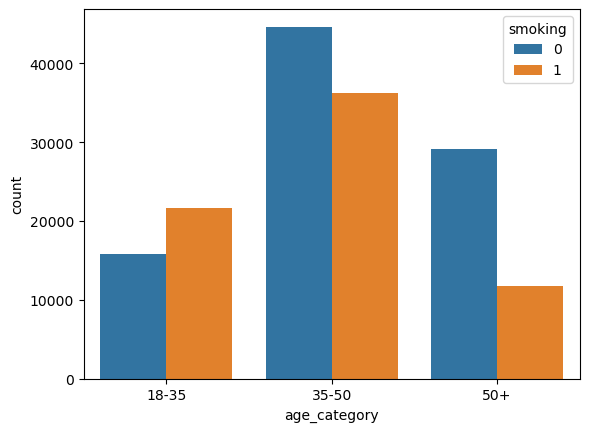

In [59]:
sns.countplot(
    data = df, 
    x="age_category", 
    hue="smoking",
)

In [60]:
df =pd.get_dummies(df, columns=['age_category'], drop_first=True)

In [61]:
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,smoking,IMC,weight_to_hip_ratio,Presión arterial,Media_vista,Vista_tramos_Media,Vista_tramos_Alta,Colesterol_LDL,age_category_35-50,age_category_50+
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,1,22.038567,0.740741,1,1.1,0,0,0.436047,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,0,23.875115,0.730337,1,1.3,0,0,0.649485,0,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,1,25.951557,0.925926,0,0.9,0,0,0.522472,0,0
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,0,29.320988,0.904762,1,2.7,0,0,0.566667,0,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,1,22.038567,0.745342,0,2.5,0,0,0.600000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,0,18.730489,0.652174,0,3.5,1,0,0.668067,1,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,0,31.217482,0.914634,0,2.0,0,0,0.507042,1,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,0,19.531250,0.757576,0,2.5,0,0,0.492063,1,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,...,1,27.548209,0.815217,0,2.2,0,0,0.484848,1,0


### Añado también las nuevas variables al df_test

In [75]:
df1 = pd.read_csv("test.csv")
df_test= df1.drop("id", axis=1)

In [76]:
df_test["IMC"] = df_test["weight(kg)"] / ((df_test['height(cm)'] / 100) ** 2)

In [77]:
df_test['weight_to_hip_ratio'] = df_test['weight(kg)'] / df_test['waist(cm)']

In [78]:
df_test['Presión arterial'] = df_test.apply(lambda row: presión_arterial_alta(row['systolic'], row['relaxation']), axis=1)

In [79]:
df_test['Media_vista'] = (df_test['eyesight(left)'] + df_test['eyesight(right)']) 

In [80]:
df_test['Vista_tramos'] = pd.cut(df_test['Media_vista'], bins=[0, 2.7, 4, 20], labels=[ 'Baja', 'Media', 'Alta'])

In [81]:
df_test =pd.get_dummies(df_test, columns=['Vista_tramos'], drop_first=True)

In [82]:
df_test['Colesterol_LDL'] = df_test['LDL'] / df_test['Cholesterol']

In [83]:
df_test['age_category'] = pd.cut(df['age'], bins=[ 18, 35, 50, 100], labels=[ '18-35', '35-50', '50+'])

In [84]:
df_test=pd.get_dummies(df_test, columns=['age_category'], drop_first=True)

### Entreno un modelo de regresión logística

In [85]:
X = df.drop('smoking', axis=1)
y = df['smoking']

In [86]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X, y)

LogisticRegression(max_iter=10000)

### Realizar predicciones 

In [87]:
y_test= logistic_model.predict_proba(df_test)[:,1]

### Crear un DataFrame con las probabilidades de fumar

In [249]:
submission = pd.DataFrame({'id': df1['id'], 'smoking': y_test})

In [ ]:
submission.to_csv('predicciones_fumar.csv', index=False)

### Obtengo los p-values

In [88]:
X_i = X.copy()

# Añadir una columna de constantes con valores 1
X_i['const'] = 1

In [89]:
# Conseguir facilmente los p_values
import statsmodels.api as sm
X_i=sm.add_constant(X) # intercept de forma manual
logit_model=sm.Logit(np.array(Y), X_i)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.487432
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               159256
Model:                          Logit   Df Residuals:                   159224
Method:                           MLE   Df Model:                           31
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                  0.2887
Time:                        10:38:13   Log-Likelihood:                -77626.
converged:                       True   LL-Null:                   -1.0913e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -38.0092      1.091    -34.825      0.000     -40.148     -35.870
a

En el siguiente archivo elimino variables que no tiene un pvalue menor a 0.05 y añado algunas nuevas que pueden ser útiles. 